In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
box_mojo_df = pd.read_csv('data/bom.movie_gross.csv')
numbers_df = pd.read_csv('data/tn.movie_budgets.csv')
title_basics_df = pd.read_csv('data/imdb.title.basics.csv')
name_basics_df = pd.read_csv('data/imdb.name.basics.csv')
crew_df = pd.read_csv('data/imdb.title.crew.csv')
principal_df = pd.read_csv('data/imdb.title.principals.csv')
ratings_df = pd.read_csv('data/imdb.title.ratings.csv')
tmdb_df = pd.read_csv('data/tmdb.movies.csv')
rt_df = pd.read_csv('data/rt.movie_info.tsv', delimiter='\t')

In [3]:
title_basics_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [4]:
tb_df = title_basics_df[['primary_title', 'start_year', 'runtime_minutes']]
tb_df

,primary_title,start_year,runtime_minutes
0,Sunghursh,2013,175.0
1,One Day Before the Rainy Season,2019,114.0
2,The Other Side of the Wind,2018,122.0
3,Sabse Bada Sukh,2018,NaN
4,The Wandering Soap Opera,2017,80.0
...,...,...,...
146139,Kuambil Lagi Hatiku,2019,123.0
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN
146141,Dankyavar Danka,2013,NaN
146142,6 Gunn,2017,116.0


In [5]:
tb_df.sort_values('start_year')

,primary_title,start_year,runtime_minutes
9599,Brainiacs in La La Land,2010,NaN
43264,Fireplace for your Home: Crackling Fireplace w...,2010,61.0
11550,Role/Play,2010,85.0
11551,Johan1,2010,78.0
11552,Hands Up,2010,90.0
...,...,...,...
2948,Untitled Star Wars Film,2024,NaN
52213,Avatar 4,2025,NaN
2949,Untitled Star Wars Film,2026,NaN
96592,Avatar 5,2027,NaN


In [6]:
tb_df = tb_df[tb_df['start_year'] < 2022]

In [7]:
tb_df.isna().sum()

primary_title          0
start_year             0
runtime_minutes    31699
dtype: int64

In [8]:
tb_df = tb_df.dropna(axis=0, subset=['runtime_minutes'])
tb_df

,primary_title,start_year,runtime_minutes
0,Sunghursh,2013,175.0
1,One Day Before the Rainy Season,2019,114.0
2,The Other Side of the Wind,2018,122.0
4,The Wandering Soap Opera,2017,80.0
5,A Thin Life,2018,75.0
...,...,...,...
146135,The Rehearsal,2019,51.0
146136,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0
146137,Safeguard,2019,90.0
146139,Kuambil Lagi Hatiku,2019,123.0


In [9]:
numbers_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [10]:
numbers_df['release_date'] = pd.to_datetime(numbers_df['release_date'])
numbers_df['release_year'] = numbers_df['release_date'].dt.year

In [11]:
numbers_df = numbers_df.drop('release_date', 1)
numbers_df

,id,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...
5777,78,Red 11,"$7,000",$0,$0,2018
5778,79,Following,"$6,000","$48,482","$240,495",1999
5779,80,Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005
5780,81,A Plague So Pleasant,"$1,400",$0,$0,2015


In [12]:
numbers_df['movie'] = numbers_df['movie'].str.title()

In [13]:
tb_df['primary_title'] = tb_df['primary_title'].str.title()

In [14]:
numbers_df['movie'].str.isalpha().sum()

1170

In [15]:
numbers_and_tb = numbers_df.merge(tb_df,left_on=['movie', 'release_year'],right_on=['primary_title', 'start_year'],how='inner')

In [16]:
numbers_and_tb['domestic_gross'] = numbers_and_tb['domestic_gross'].replace(',', '', regex=True)
numbers_and_tb['production_budget'] = numbers_and_tb['production_budget'].replace(',', '', regex=True)
numbers_and_tb['worldwide_gross'] = numbers_and_tb['worldwide_gross'].replace(',', '', regex=True)
numbers_and_tb['domestic_gross'] = numbers_and_tb['domestic_gross'].str.strip('$')
numbers_and_tb['production_budget'] = numbers_and_tb['production_budget'].str.strip('$')
numbers_and_tb['worldwide_gross'] = numbers_and_tb['worldwide_gross'].str.strip('$')

In [17]:
numbers_and_tb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1564 entries, 0 to 1563
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1564 non-null   int64  
 1   movie              1564 non-null   object 
 2   production_budget  1564 non-null   object 
 3   domestic_gross     1564 non-null   object 
 4   worldwide_gross    1564 non-null   object 
 5   release_year       1564 non-null   int64  
 6   primary_title      1564 non-null   object 
 7   start_year         1564 non-null   int64  
 8   runtime_minutes    1564 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 122.2+ KB


In [18]:
numbers_and_tb['domestic_gross'] = pd.to_numeric(numbers_and_tb['domestic_gross'])
numbers_and_tb['production_budget'] = pd.to_numeric(numbers_and_tb['production_budget'])
numbers_and_tb['worldwide_gross'] = pd.to_numeric(numbers_and_tb['worldwide_gross'])

In [19]:
numbers_and_tb = numbers_and_tb.loc[numbers_and_tb['domestic_gross'] > 0]
numbers_and_tb

,id,movie,production_budget,domestic_gross,worldwide_gross,release_year,primary_title,start_year,runtime_minutes
0,2,Pirates Of The Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,Pirates Of The Caribbean: On Stranger Tides,2011,136.0
1,3,Dark Phoenix,350000000,42762350,149762350,2019,Dark Phoenix,2019,113.0
2,4,Avengers: Age Of Ultron,330600000,459005868,1403013963,2015,Avengers: Age Of Ultron,2015,141.0
3,7,Avengers: Infinity War,300000000,678815482,2048134200,2018,Avengers: Infinity War,2018,149.0
4,9,Justice League,300000000,229024295,655945209,2017,Justice League,2017,120.0
...,...,...,...,...,...,...,...,...,...
1544,4,Happy Christmas,70000,30312,30312,2014,Happy Christmas,2014,82.0
1549,18,Tiny Furniture,50000,391674,424149,2010,Tiny Furniture,2010,98.0
1550,20,Counting,50000,8374,8374,2015,Counting,2015,111.0
1554,32,Raymond Did It,40000,3632,3632,2011,Raymond Did It,2011,83.0


In [20]:
numbers_and_tb = numbers_and_tb.sort_values('worldwide_gross', ascending=False)
numbers_and_tb.head(10)

,id,movie,production_budget,domestic_gross,worldwide_gross,release_year,primary_title,start_year,runtime_minutes
3,7,Avengers: Infinity War,300000000,678815482,2048134200,2018,Avengers: Infinity War,2018,149.0
23,34,Jurassic World,215000000,652270625,1648854864,2015,Jurassic World,2015,124.0
47,67,Furious 7,190000000,353007020,1518722794,2015,Furious 7,2015,137.0
18,27,The Avengers,225000000,623279547,1517935897,2012,The Avengers,2012,143.0
2,4,Avengers: Age Of Ultron,330600000,459005868,1403013963,2015,Avengers: Age Of Ultron,2015,141.0
27,42,Black Panther,200000000,700059566,1348258224,2018,Black Panther,2018,134.0
79,13,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,2018,Jurassic World: Fallen Kingdom,2018,128.0
110,56,Frozen,150000000,400738009,1272469910,2013,Frozen,2013,102.0
97,35,Beauty And The Beast,160000000,504014165,1259199706,2017,Beauty And The Beast,2017,129.0
28,44,Incredibles 2,200000000,608581744,1242520711,2018,Incredibles 2,2018,118.0


In [21]:
top_10 = numbers_and_tb.iloc[:10]
top_10_20 = numbers_and_tb.iloc[10:20]
top_20_30 = numbers_and_tb.iloc[20:30]
top_30_40 = numbers_and_tb.iloc[30:40]
top_40_50 = numbers_and_tb.iloc[40:50]

In [22]:
top_10

,id,movie,production_budget,domestic_gross,worldwide_gross,release_year,primary_title,start_year,runtime_minutes
3,7,Avengers: Infinity War,300000000,678815482,2048134200,2018,Avengers: Infinity War,2018,149.0
23,34,Jurassic World,215000000,652270625,1648854864,2015,Jurassic World,2015,124.0
47,67,Furious 7,190000000,353007020,1518722794,2015,Furious 7,2015,137.0
18,27,The Avengers,225000000,623279547,1517935897,2012,The Avengers,2012,143.0
2,4,Avengers: Age Of Ultron,330600000,459005868,1403013963,2015,Avengers: Age Of Ultron,2015,141.0
27,42,Black Panther,200000000,700059566,1348258224,2018,Black Panther,2018,134.0
79,13,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,2018,Jurassic World: Fallen Kingdom,2018,128.0
110,56,Frozen,150000000,400738009,1272469910,2013,Frozen,2013,102.0
97,35,Beauty And The Beast,160000000,504014165,1259199706,2017,Beauty And The Beast,2017,129.0
28,44,Incredibles 2,200000000,608581744,1242520711,2018,Incredibles 2,2018,118.0


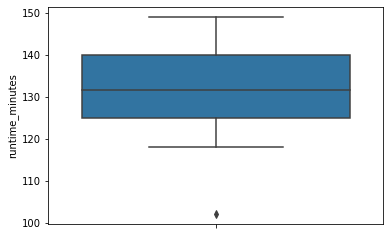

In [23]:
x1 = top_10['runtime_minutes']
x2 = top_10_20['runtime_minutes']
x3 = top_20_30['runtime_minutes']
x4 = top_30_40['runtime_minutes']
x5 = top_40_50['runtime_minutes']
sns.boxplot(y='runtime_minutes', data=top_10);


In [24]:
numbers_and_tb['runtime_minutes'][:50].mean()

126.54

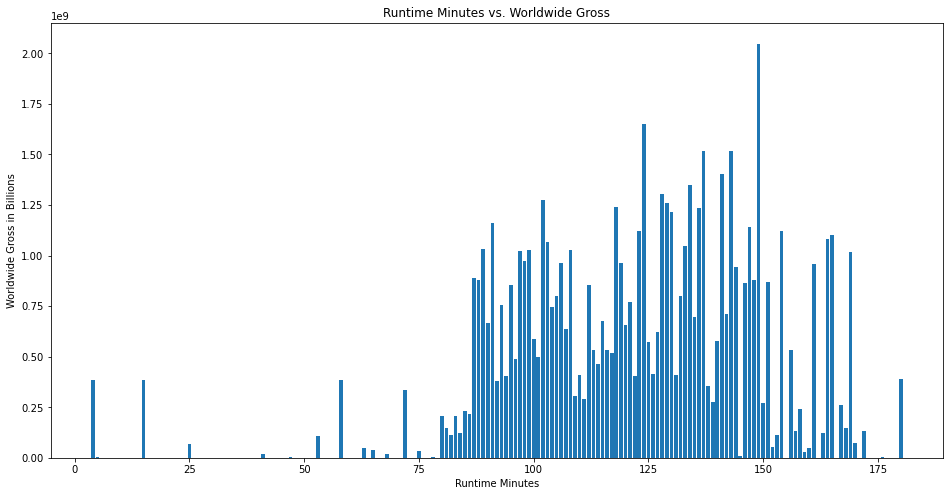

In [27]:
fig, ax = plt.subplots(figsize=(16, 8))


ax.bar(numbers_and_tb['runtime_minutes'], numbers_and_tb['worldwide_gross'],)


ax.tick_params(axis="x")
ax.set_xlabel("Runtime Minutes")
ax.set_ylabel("Worldwide Gross in Billions")
ax.set_title("Runtime Minutes vs. Worldwide Gross");